# Problem Understanding
## The labor market in Sri Lanka is a crucial component of its economic landscape, influencing employment rates, workforce dynamics, and overall socio-economic development. However, amidst shifting global economic paradigms, technological advancements, and domestic policy reforms, understanding the current state and emerging trends within Sri Lanka's labor market is imperative for policymakers, businesses, researchers, and stakeholders alike. This study aims to delve into the intricacies of the Sri Lankan labor market to identify, analyze, and interpret the prevailing trends, challenges, and opportunities.

# 1. Data Collection and Cleaning
## Data Understanding and Data Visualization

In [50]:
import pandas as pd
import pickle



# Read Sri Lanka's Labour force participation survey statistics data from the CSV file
data = pd.read_csv('https://raw.githubusercontent.com/niruhere/Sri-Lanka-Labor-Market-Trend/main/ILOSTAT_SriLanka_LabourMarketTrenddata.csv')

# Understand the data
data.describe
data.columns
data.shape
data.head(10)

# Remove unwanted columns "Country" and "Source" from the data
data.drop(['Country', 'Source'], axis=1, inplace=True)

# Remove rows having null values(removes 38 out of 1314 records)
data.dropna(axis=0, inplace=True)

# Rename column "Area type" to "Sector", "Sex" to Gender
data.rename(columns = {'Area type':'Sector', 'Sex': 'Gender'}, inplace = True)

data.info()
# Change Categorical columns to numerical columns
# Sector("Something Something")

<class 'pandas.core.frame.DataFrame'>
Index: 1276 entries, 0 to 1313
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Gender     1276 non-null   object 
 1   Education  1276 non-null   object 
 2   Sector     1276 non-null   object 
 3   Year       1276 non-null   int64  
 4   Value      1276 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 59.8+ KB


## Let us visualize and analyse the data by plotting them to Line Charts, Heatmap etc., to better understand the corelation between the parameters in data

## Analyse the Labour Force Participation Rate over the years

In [51]:
#import matplotlib.pyplot as plt
import plotly.express as px

# Line Chart - Analyse LFPR for entire Population over the Years
fig_line = px.line(data.loc[(data.Gender == "Total") & (data.Education == "Aggregate levels: Total") & (data.Sector == "Area type: National")], x="Year", y="Value", title="Labour Force Participation Rate at the National Level over the years", labels={"Value": "Labour Force Participation Rate in %"})
fig_line.show()

## Analyse the Labour Force Participation rate by Gender over the Years

In [52]:

# Line Chart - Analyse LFPR for Male/Female(by Gender) over the Years
fig_line = px.line(data.loc[((data.Gender == "Male") | (data.Gender == "Female")) & (data.Education == "Aggregate levels: Total") & (data.Sector == "Area type: National")], x="Year", y="Value", color="Gender", title="Labour Force Participation Rate at the National Level by Gender over the years", labels={"Value": "Labour Force Participation Rate in %"})
fig_line.show()



## Analyse LFPR by Education over the years

In [53]:
# Line Chart - Analyse LFPR for Male/Female(by Gender) over the Years
fig_line = px.line(data.loc[(data.Gender == "Total")  & (data.Sector == "Area type: National")], x="Year", y="Value", color="Education", title="Labour Force Participation Rate by Education Level over the years", labels={"Value": "Labour Force Participation Rate in %"})
fig_line.show()


## Analyse the Labour Force Participation rate by Sector over the Years

In [54]:
# Line Chart - Analyse LFPR for Male/Female(by Sector) over the Years
fig_line = px.line(data.loc[(data.Gender == "Total")  & (data.Education == "Aggregate levels: Total")], x="Year", y="Value", color="Sector", title="Labour Force Participation Rate by Sector over the years", labels={"Value": "Labour Force Participation Rate in %"})
fig_line.show()

## Analyse the Labour Force Participation rate by Gender and Sector over the Years

In [55]:
# Analyse LFPR by Gender and Sector


# Graph Objects

import plotly.graph_objects as go

# define figure element
fig = go.Figure()
# define histogram properties
fig = (
    px.histogram(
        data.loc[((data.Education == "Aggregate levels: Total"))],
        x="Year",
        y="Value",
        color="Gender",
        pattern_shape="Sector",
        color_discrete_sequence=['blue', 'pink', 'green'],
        barmode="relative",
        # barnorm = "percent",
        # histnorm = "probability",
        text_auto=True,
        labels={"Value": "Labour Force Participation Rate by %",},
    )
    .update_traces(hoverinfo="all")
    .update_layout(
        # update layout with titles
        title={
            "text": "Labour Force Participation Rate by Gender and Sector",
            "x": 0.5,
        },
        yaxis_title="Labour Force Participation Rate by %",
    )
    .update_xaxes(categoryorder="category ascending")
)
# display the figure
fig.show()


## Analyse the Labour Force Participation rate by Gender and Education Level over the Years

In [56]:
# Using Facet Plot - LFPR rate for different subsets of data

fig = px.scatter(data.loc[(data.Gender != "Total") & (data.Sector.str.contains("National"))], x='Year', y='Value',color='Gender', facet_col='Education', facet_col_wrap=3)
fig.update_layout(title="Labour Force Participation rate(LFPR%) over the years by Gender and Education Level",
                  xaxis_title="Year",
                  yaxis_title="LFPR %")

fig.show()

## Analyse the Labour Force Participation rate by Gender, Sector and Education (at Aggregate Level)over the Years

In [57]:
import numpy as np


fig = px.density_heatmap(data.loc[(data.Gender != "Total") & ((data.Sector.str.contains("Rural")) | (data.Sector.str.contains("Urban"))) & (data.Education.str.contains("Aggregate levels"))], x="Year", y="Education", nbinsx=10,  z="Value", facet_row="Gender", facet_col="Sector", histfunc="avg", labels={'Value': 'LFPR%'}, text_auto=True)
fig.update_layout(title="Labour Force Participation rate(LFPR%) over the years by Gender and Sector at the Aggregate Education Level",
                  xaxis_title="Year",
                  yaxis_title="Aggregate Education level")
fig.show()

# 2. Data Preprocessing

In [58]:
# Change Categorical columns to numerical columns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Remove rows pertaining to Gender -> Total
data = data[data['Gender'] != "Total"]

#Separate Target from features
y = data.Value
x = data.drop(['Value'], axis=1)

#Divide data into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(x, y, train_size=0.8, test_size=0.2, random_state=0)

#Divide training data further into training and validation set
X_train, X_valid, Y_train, Y_valid = train_test_split(X_train, Y_train, train_size=0.8, test_size=0.2, random_state=0)

#Get the categorical columns
categorical_cols = [cname for cname in X_train.columns if
                        X_train[cname].dtype == "object"]
#Get the numerical columns
numerical_cols = [cname for cname in X_train.columns if X_train[cname].dtype != "object"]

# Define Preprocessing steps- Impute missing values and apply onehot encoding in adddition to impute for categ values
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

# Preprocessing for numerical data
numerical_transformer = SimpleImputer(strategy='median')

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])


# 3. Model Selection and Training

## Using Linear Regression

In [59]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Select and train using Linear Regression
model = LinearRegression()

# Define a method that takes input parameters as model, preprocessor and
# returns the MAE, MSE and R2 Score

def train_and_getscores(model, preprocessor):

# Bundle preprocessing and modeling code in a pipeline
  my_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', model)
                             ])

# Preprocessing of training data, fit model
  my_pipeline.fit(X_train, Y_train)

# Preprocessing of validation data, get predictions
  preds = my_pipeline.predict(X_valid)

# Calculate MAE (MEan Absolute Error)
  scores = {}
  scores["MAE"] = mean_absolute_error(Y_valid, preds)

# Calculate MSE (MEan Squared Error)
  scores["MSE"] = mean_squared_error(Y_valid, preds)

# Calculate R2 score
  scores["R2"]  = r2_score(Y_valid, preds)

  return my_pipeline, scores




my_pipeline, scores = train_and_getscores(model, preprocessor)
print('Scores for Linear Regression:')
for key, value in scores.items():
  print(key, value)

final_scores = {}
final_scores['Linear Regression'] = scores


Scores for Linear Regression:
MAE 8.469995998822153
MSE 106.75504744697618
R2 0.8038875739751179


## Evaluation and Validation using Linear Regression Model

In [60]:
# Evaluate the performance of the Model on the data it hasnot learnt
Y_predict = my_pipeline.predict(X_test)


# Calculate the MAE, MSE and R2 score by comparing Y_test and Y_predict
# Evaluate the model
score_linearreg_test = mean_absolute_error(Y_test, Y_predict)
print('MAE:', score_linearreg_test)

scoremse_linearreg_test = mean_squared_error(Y_test, Y_predict)
print('MSE:', scoremse_linearreg_test)

# Calculate R2 score
scorer2_linearreg_test = r2_score(Y_test, Y_predict)
print('R2 Score:', scorer2_linearreg_test)

MAE: 7.512085483166909
MSE: 92.04319405739989
R2 Score: 0.8153025882782473


## Using RandomForest Regressor

In [80]:
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor

# Select and train using Random Forest Regressor
#Define the Model
model = RandomForestRegressor(n_estimators=250, random_state=0)

my_pipeline, scores = train_and_getscores(model, preprocessor)
print('Scores for Random Forest Regressor:')
for key, value in scores.items():
  print(key, value)

final_scores['Random Forest Regression'] = scores

filename = 'random_forest_model.sav'
# pickle.dump(model, open(filename, 'wb'))


# Save the model to a file
# https://raw.githubusercontent.com/niruhere/Sri-Lanka-Labor-Market-Trend/main/random_forest_model.pkl
# filename = 'https://raw.githubusercontent.com/niruhere/Sri-Lanka-Labor-Market-Trend/main/random_forest_model.pickle'
pickle.dump(my_pipeline, open(filename, 'wb'))

Scores for Random Forest Regressor:
MAE 1.7880088888888752
MSE 15.207439771259137
R2 0.9720634482538147


## Evaluation and Validation using RandomForestRegressor

In [63]:
# Evaluate the performance of the Model on the data it hasnot learnt
Y_predict = my_pipeline.predict(X_test)

# Calculate the MAE and MSE by comparing Y_test and Y_predict
# Evaluate the model
score_ranforreg_test = mean_absolute_error(Y_test, Y_predict)
print('MAE:', score_ranforreg_test)

scoremse_ranforreg_test = mean_squared_error(Y_test, Y_predict)
print('MSE:', scoremse_ranforreg_test)

# Calculate R2 score
scorer2_ranforreg_test = r2_score(Y_test, Y_predict)
print('R2 Score:', scorer2_ranforreg_test)


MAE: 2.068217751479293
MSE: 11.054378703905368
R2 Score: 0.9778178587160923


## Using Decision Tree Regressor

In [64]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error

# Fit regresssion model
model = DecisionTreeRegressor(max_depth=2, random_state=0)


my_pipeline, scores = train_and_getscores(model, preprocessor)
print('Scores for Decision Tree Regressor:')
for key, value in scores.items():
  print(key, value)

final_scores['Decision Tree Regression'] = scores

Scores for Decision Tree Regressor:
MAE 10.244939899683812
MSE 217.78339633095217
R2 0.5999249569570474


## Evaluation and Validation using Decision Tree Regression

In [66]:
# Evaluate the performance of the Model on the data it hasnot learnt
Y_predict = my_pipeline.predict(X_test)


# Calculate the MAE, MSE and R2 score by comparing Y_test and Y_predict
score_dectreereg_test = mean_absolute_error(Y_test, Y_predict)
print('MAE:', score_dectreereg_test)

scoremse_dectreereg_test = mean_squared_error(Y_test, Y_predict)
print('MSE:', scoremse_dectreereg_test)

# Calculate R2 score
scorer2_dectreereg_test = r2_score(Y_test, Y_predict)
print('R2 Score:', scorer2_dectreereg_test)

MAE: 9.82621475525662
MSE: 219.40514853147258
R2 Score: 0.5597331941032118


## Using Support Vector Regression

In [67]:
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error

# Fit regresssion model
model = SVR()

my_pipeline, scores = train_and_getscores(model, preprocessor)
print('Scores for Support Vector Regressor:')
for key, value in scores.items():
  print(key, value)

final_scores['Support Vector Regression'] = scores

final_scores

Scores for Support Vector Regressor:
MAE 22.394011040306385
MSE 726.6609414093293
R2 -0.33489931881759283


{'Linear Regression': {'MAE': 8.469995998822153,
  'MSE': 106.75504744697618,
  'R2': 0.8038875739751179},
 'Random Forest Regression': {'MAE': 1.7880088888888752,
  'MSE': 15.207439771259137,
  'R2': 0.9720634482538147},
 'Decision Tree Regression': {'MAE': 10.244939899683812,
  'MSE': 217.78339633095217,
  'R2': 0.5999249569570474},
 'Support Vector Regression': {'MAE': 22.394011040306385,
  'MSE': 726.6609414093293,
  'R2': -0.33489931881759283}}

## Evaluation and Validation using Support Vector Regression

In [68]:
# Evaluate the performance of the Model on the data it hasnot learnt
Y_predict = my_pipeline.predict(X_test)

# Calculate the MAE, MSE and R2 score by comparing Y_test and Y_predict
score_svrreg_test = mean_absolute_error(Y_test, Y_predict)
print('MAE:', score_svrreg_test)

scoremse_svrreg_test = mean_squared_error(Y_test, Y_predict)
print('MSE:', scoremse_svrreg_test)

# Calculate R2 score
scorer2_svrreg_test = r2_score(Y_test, Y_predict)
print('R2 Score:', scorer2_svrreg_test)

MAE: 19.766217724939672
MSE: 613.1861850892251
R2 Score: -0.2304429724471333


## Select the Model that best fits

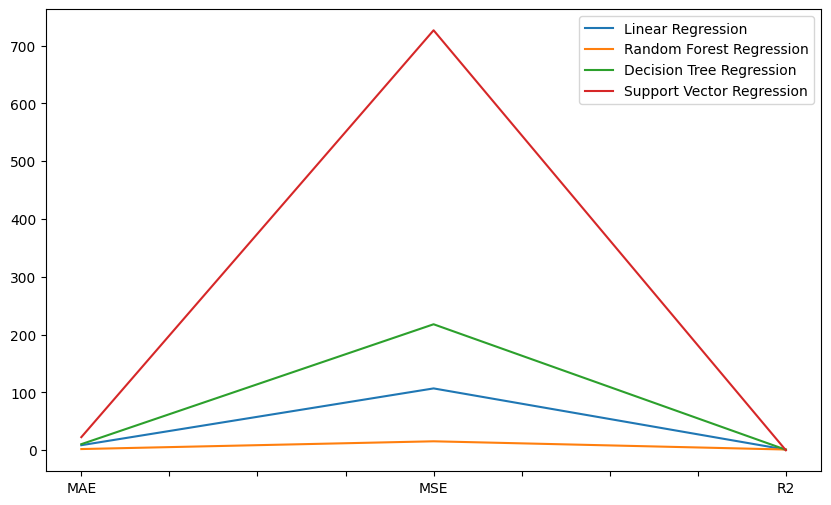

In [69]:
import matplotlib.pyplot as plt
scores_df = pd.DataFrame.from_dict(final_scores)
scores_df.plot(figsize=(10,6))
plt.show()

# 5. Deployment and Maintenance

In [70]:
# loaded_model = pickle.load(open(filename, 'rb'))
# pred_result = loaded_model.predict(X_test)

# Load the model using Pickle
filename = "random_forest_model.sav"
with open('random_forest_model.sav', 'rb') as file:
    loaded_model_pickle = pickle.load(file)

pred_result = loaded_model_pickle.predict(X_test)



FileNotFoundError: [Errno 2] No such file or directory: 'https://raw.githubusercontent.com/niruhere/Sri-Lanka-Labor-Market-Trend/main/random_forest_model.pkl'

In [71]:
# Calculate the MAE, MSE and R2 score by comparing Y_test and Y_predict
score_test = mean_absolute_error(Y_test, pred_result)
print('MAE:', score_test)

scoremse_test = mean_squared_error(Y_test, pred_result)
print('MSE:', scoremse_test)

# Calculate R2 score
scorer2_test = r2_score(Y_test, pred_result)
print('R2 Score:', scorer2_test)

NameError: name 'pred_result' is not defined